In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.datasets import make_blobs

C:\Users\Nitin\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Nitin\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


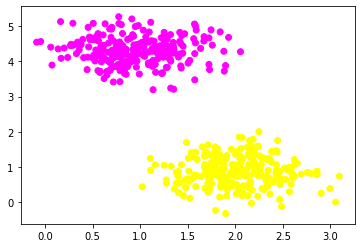

In [2]:
#Make_blobs() is used to create test datasets in python
x,y = make_blobs(n_samples=500, centers= 2, random_state=0, cluster_std= 0.4)

plt.scatter(x[:, 0], x[:,1], c=y,cmap='spring')
plt.show()

In [3]:
df = pd.DataFrame(x,y)
df

0         1
0   0.737744  4.282760
1   2.128838  0.743468
0   0.816490  4.451810
0   1.669359  4.577588
1   2.439545  1.429289
..       ...       ...
0   0.060822  4.404381
1   2.413372  1.447649
0   0.442567  3.765100
1   1.916287  0.665156
0   0.701135  3.818156

[500 rows x 2 columns]

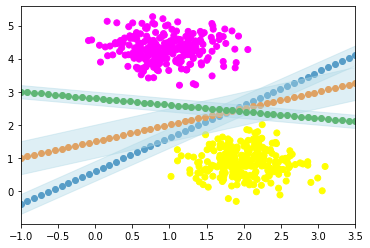

In [4]:
xfit = np.linspace(-1, 3.5)

plt.scatter(x[:,0],x[:,1], c=y, cmap='spring')

for a,b,c in [(1.0,0.6,0.3),(0.5,1.5,0.5),(-0.2,2.8,0.2)]:
    yfit = a*xfit+b
    plt.scatter(xfit, yfit)
    plt.fill_between(xfit, yfit-c, yfit+c, color = 'lightblue', alpha=0.4)
    
plt.xlim(-1,3.5)
plt.show()

In [6]:
#Applying SVM classifier to Iris
irs = pd.read_csv('iris.csv')
irs.head(3)

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa

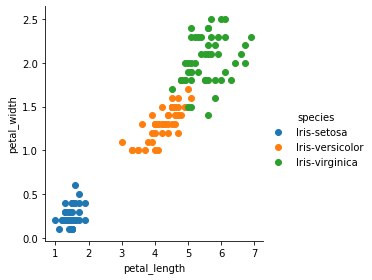

In [8]:
sns.FacetGrid(irs, hue = 'species',height=4)\
.map(plt.scatter, 'petal_length','petal_width')\
.add_legend()
plt.show()

In [10]:
X = irs[['petal_length','petal_width']]
y = irs['species']

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
encode = LabelEncoder()
y = encode.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
from sklearn.svm import SVC
model = SVC()
model.fit(X,y)

SVC()

In [16]:
#Plotting separate classes
x_min, x_max = X['petal_length'].min(), X['petal_length'].max()
y_min, y_max = X['petal_width'].min(), X['petal_width'].max()
h = (x_max/x_min)/100

x_cord, y_cord = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max,h))

C:\Users\Nitin\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


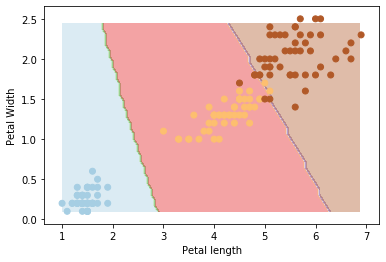

In [17]:
plt.subplot(1,1,1)
z = model.predict(np.c_[x_cord.ravel(), y_cord.ravel()])
z = z.reshape(x_cord.shape)
plt.contourf(x_cord,y_cord, z, cmap = plt.cm.Paired, alpha=0.4)

plt.scatter(X['petal_length'], X['petal_width'], c=y, cmap=plt.cm.Paired)
plt.xlabel("Petal length")
plt.ylabel('Petal Width')
plt.show()